In [25]:
import random
from math import exp, fsum, log
from statistics import mean

# Part 2: Scalar Backpropagation

## Question 3

### Functions

In [2]:
def sigmoid(x):
  return 1 / (1 + exp(-x))

def softmax(o,i):
  """
    Parameters:
      -o : vector of softmax input
      -i : index i of numerator 
  """
  return exp(o[i]) / fsum([exp(oj) for oj in o])

def cross_entropy_loss(y,t):
  """
    Parameters:
      -y: vector y output of softmax
      -t: target vector
  """
  return -1 * log(y[t.index(1)])

def scalar_dl_dy(y,t,i):
  """
    Parameters:
      -y: vector output of softmax
      -t: target vector
      -i: index of y
  """
  if i == t.index(1):
      dl_dy_i = -1.0 / y[i]
  else:
      dl_dy_i = 0.0  
  
  return dl_dy_i

def scalar_dy_do(y,i,j):
  """
    Parameters:
      -y: vector output of softmax
      -i: index of y
      -j: index of o ( o = h*V +c)
  """
  if i==j:
    dy_do = y[i]*(1-y[i])
  else:
    dy_do = -1*y[i]*y[j]
  
  return dy_do

def scalar_dl_do(dl_dy,dy_do,i,t):
  """
    Parameters:
      -dl_dy: vector of derivates of the loss wrt softmax output
      -dy_do: matrix with derivatives of softmax output wrt softmax input ( o = h*V +c)
      -i    : index of o
      -t    : target vector
  """
  dl_do_i = dl_dy[t.index(1)]*dy_do[t.index(1)][i]

  return dl_do_i  

def scalar_do_dh(V,i,j):
  """
      Parameters:
        -V: matrix of weights from sigmoid output to softmax input
        -i: index of o (softmax input)
        -j: index of h (sigmoid output)
    """
  return V[j][i]

def scalar_dl_dh(dl_do,do_dh,i):
  """
    Parameters:
      -dl_do: vector of derivates of the loss wrt softmax input
      -do_dh: matrix with derivatives of softmax input wrt sigmoid output
      -i    : index of k (sigmoid output)
  """
  dl_dh_i = 0.0
  for j,__ in enumerate(dl_do):
    
    dl_dh_i += dl_do[j]*do_dh[j][i]

  return dl_dh_i  

def scalar_dl_dv(dl_do,do_dv_ij,j):
  """
    Parameters:
      -dl_do    : vector of derivatives of the loss wrt softmax inputs
      -do_dv_ij : scalar derivative of the ith-element of softmac inputs wrt the ij_th elements of weights V
      -j        : column index of weights V
  """
  
  return dl_do[j]*do_dv_ij

def scalar_dl_dc(dl_do,do_dc_i,i):
  """
    -Parameters:
      -dl_do    : derivative of the loss wrt softmax input
      -do_dc_i  : derivative of softmax inpuot with respect to weight c (always 1)
      -i        : index of softmax input
  """
  return dl_do[i]*do_dc_i

def scalar_dh_dk(k,i):
  """
    -Parameters:
      -k: vector linear input of sigmoid
      -i: index of k
  """
  return sigmoid(k[i])*(1-sigmoid(k[i]))

def scalar_dl_dk(dl_dh,dh_dk,i):
  """
    -Parameters:
      -dl_dh: derivative of the loss wrt sigmoid output
      -dh_dk: derivative of the sigmoid output wrt to sigmoid input
      -i    : index of sigmoid input k
  """
  return dl_dh[i]*dh_dk[i]

def scalar_dl_dw(dl_dk, dk_dw_ij,j):
  """
      -dl_dk    : vector of derivatives of the loss wrt sigmoid inputs
      -dk_dw_ij : scalar derivative of the jth-element of sigmoid inputs wrt the ij_th-elements of weights W
      -j        : column index of weights W
  """

  return dl_dk[j]*dk_dw_ij

def scalar_dl_db(dl_dk,dk_db_i,i):
  """
    -Parameters:
      -dl_dk    : derivative of the loss wrt sigmoid input
      -dk_db_i  : derivative of sigmoid input with respect to weight b (always 1)
      -i        : index of sigmoid input
  """
  return dl_dk[i]*dk_db_i  


In [ ]:
def initialize():
    """ Initialize lists of inputs, bias, weights and target class"""
    x = [1.0,-1.0]              #inputs

    W = [[1.0, 1.0, 1.0],
        [-1.0, -1.0, -1.0]
        ]                       #input weights

    b = [0.0, 0.0, 0.0]         # input-bias

    k = [0.0, 0.0, 0.0]         # linear outputs  (x * W + b )

    h = [0.0, 0.0, 0.0]         # sigmoid activation outputs

    c = [0.0, 0.0]              # constant-bias 

    V = [[1.0, 1.0],
        [-1.0, -1.0],
        [-1.0, -1.0]
        ]                       # sigmoid-output weights

    o = [0.0, 0.0]              # h * V + c

    y = [0.0, 0.0]              # softmax activated output

    t = [1,0]                   #target class
    
    return x,W,b,k,h,c,V,o,y,t

### Forward Pass

In [ ]:
x,W,b,k,h,c,V,o,y,t = initialize()

# K = X * W + b
for j,_ in enumerate(k):     # Len of K-nodes
    for i,_ in enumerate(x): # number of inputs
        k[j] += W[i][j] * x[i]

    k[j] += b[j]

    h[j] = sigmoid(k[j])

#SoftMax Input
for j,_ in enumerate(o):
    for i,_ in enumerate(h):
        o[j] += h[i] * V[i][j]

    o[j] += c[j]

#Softmax activation
for i,_ in enumerate(y):
    y[i] = softmax(o,i)

l = cross_entropy_loss(y,t)

print(f"-Linear non-activated outputs: \nk = {k}\n")
print(f"-Sigmoid activated outputs: \nh = {h}\n")
print(f"-Soft-Max activation : \ny={y}\n")
print(f"Loss = -log(y_c) = {l}")


### Backward Pass

In [ ]:
""" ############# DL / DY #############"""
dl_dy = [0.0, 0.0] #derivatives of the loss w.r.t softmax output

for i in range(0,len(dl_dy)):

    dl_dy[i] = scalar_dl_dy(y,t,i)

print(f"dl_dy = {dl_dy}")


""" ############# DY / DO #############"""

dy_do = [[0.0, 0.0],[0.0, 0.0]] #derivatives of the loss w.r.t softmax output

for i,y_i in enumerate(y):
    for j,o_j in enumerate(o):
        dy_do[i][j] = scalar_dy_do(y,i,j)

print(f"dy_do = {dy_do}")

""" ############# DL / DO ############# """

dl_do = [0.0, 0.0]

for i in range(0,len(dl_do)):

    # dl_do[i] = scalar_dl_do(dl_dy,dy_do,i)
    dl_do[i] = scalar_dl_do(dl_dy,dy_do,i,t)

print(f"dl_do = {dl_do}")

""" ############# DO / DH #############"""

do_dh = [[0.0,0.0,0.0],[0.0,0.0,0.0]]

for i,__ in enumerate(o):
    for j,__ in enumerate(h):
        do_dh[i][j] = scalar_do_dh(V,i,j)

print(f"do_dh = {do_dh}")

""" ############# DL / DH #############"""

dl_dh = [0.0, 0.0, 0.0]


for i,__ in enumerate(h):
    dl_dh[i] = scalar_dl_dh(dl_do,do_dh,i)

print(f"dl_dh = {dl_dh}")

""" ############# DL / DV #############"""

dl_dv = [[0.0, 0.0],[0.0, 0.0],[0.0, 0.0]]

for i,h_i in enumerate(h): # V edges come out from h-nodes
    for j, __ in enumerate(dl_dv[i]):
        dl_dv[i][j] = scalar_dl_dv(dl_do, h_i, j)  # dOi_dVij is just h[i]

print(f"dl_dv = {dl_dv}")

""" ############# DL / DC #############"""
dl_dc = [0.0, 0.0]

for i,c_i in enumerate(c):
    do_dc_i  = 1  # O_i = sum_j(h_j*V_ji) + c_i  ==> do_i/dc_i = 1 for any i
    dl_dc[i] = scalar_dl_dc(dl_do,do_dc_i,i)

print(f"dl_dc = {dl_dc}")


""" ############# DL / DK #############"""
"""   -> using DH/DK"""    

dl_dk = [0.0, 0.0, 0.0]
dh_dk = [0.0, 0.0, 0.0]  #only interested in same i-index e.g dHi/dKi
for i, k_i in enumerate(k):
    dh_dk[i] = scalar_dh_dk(k,i)

for i,k_i in enumerate(k):
    dl_dk[i] = scalar_dl_dk(dl_dh,dh_dk,i)

print(f"dh_dk = {dh_dk}")
print(f"dl_dk = {dl_dk}")

""" ############# DL / DW #############"""

dl_dw = [[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]

for i, x_i in enumerate(x): # W edges come out from x-nodes
    for j, __ in enumerate(dl_dw[i]):
        dl_dw[i][j] = scalar_dl_dw(dl_dk, x_i,j) # dKi_dWij is just x[i]

print(f"dl_dw = {dl_dw}")

""" ############# DL / DB ############# """

dl_db = [0.0, 0.0, 0.0]

for i,b_i in enumerate(b):
    dk_db_i  = 1  # K_i = sum_j(x_j*W_ji) + b_i  ==> dk_i/db_i = 1 for any i
    dl_db[i] = scalar_dl_db(dl_dk,dk_db_i,i)

print(f"dl_db = {dl_db}")


## Question 4

In [3]:
from data import load_synth
import matplotlib.pyplot as plt 
#(xtrain, ytrain), (xval, yval), num_cls = load_synth()


In [13]:
class Q4_DNN:
    def __init__(self):
        self.x = None #first layer input nodes
        self.W = None #first layer weights matrix
        self.b = None #input bias
        self.k = None #first layer linear output
        self.h = None #sigmoid activation output
        self.V = None #second layer weight matrix
        self.c = None #second layer bias
        self.o = None #softmax input
        self.y = None #softmax output
        self.t = None #target vector

        (self.xtrain, self.ytrain), (self.xval, self.yval), self.num_cls = load_synth()

    def default_init(self):
        self.set_nodes()
        self.set_weights_W()
        self.set_weights_V()
        self.set_bias_b()
        self.set_bias_c()        
    
    def set_nodes(self,x=2,k=3,h=3,o=2,y=2):
        """
        Inititalize list of nodes with specific sizes
        Also works for reset values for a new fordward pass
        Parameters:
            x: size of first layer input nodes
            k: size of first layer linear output
            h: size of sigmoid nodes layer
            o: size of softmax input layer
            y: size of softmax output layer
        """
        self.x = [0.0 for _ in range(x)]
        self.k = [0.0 for _ in range(k)]
        self.h = [0.0 for _ in range(h)]
        self.o = [0.0 for _ in range(o)]
        self.y = [0.0 for _ in range(y)]

    def set_derivative_lists(self):
        dl_dy = [0., 0.] #derivatives of the loss w.r.t softmax output
        dy_do = [[0., 0.],[0., 0.]] #derivatives of the loss w.r.t softmax output
        dl_do = [0., 0.]
        do_dh = [[0.,0.,0.],[0.,0.,0.]]
        dl_dh = [0., 0., 0.]
        dl_dv = [[0., 0.],[0., 0.],[0., 0.]]
        dl_dc = [0., 0.]
        dl_dk = [0., 0., 0.]
        dh_dk = [0., 0., 0.]  #only interested in same i-index e.g dHi/dKi
        dl_dw = [[0., 0., 0.], [0., 0., 0.],[0., 0., 0.]]
        dl_db = [0., 0., 0.]

        return dl_dy,dy_do,dl_do,do_dh,dl_dh,dl_dv,dl_dc,dl_dk,dh_dk,dl_dw,dl_db
    
    def set_weights_W(self,mu=0,sigma=0.1):
        """
        Initialize weights matrix W
        Parameters:
            -seed   : random seed
            -mu     : mean of the normal distribution from where the random weights are generated
            -sigma  : standar deviation of the normal distribution from where the random weights are generated
        """
        # self.W = [np.random.normal(loc=5,scale=0.1,size=3),np.random.normal(loc=0,scale=0.1,size=3)]        
        self.W = [[random.random() for _ in range(3)] for _ in range(2)]


    def set_weights_V(self,mu=0,sigma=0.1):
        """
        Initialize weights matrix V
        Parameters:
            -seed   : random seed
            -mu     : mean of the normal distribution from where the random weights are generated
            -sigma  : standar deviation of the normal distribution from where the random weights are generated
        """
        # random.seed(32)
        # self.V = [[np.random.normal(loc=mu,scale=sigma) for _ in range(len(self.o))] for _ in range(len(self.h))]
        # self.V = [np.random.normal(loc=5,scale=0.1,size=2),np.random.normal(loc=0,scale=0.1,size=2),np.random.normal(loc=0,scale=0.1,size=2)]        
        self.V = [[random.random() for _ in range(2)] for _ in range(3)]
    
    def set_bias_b(self,b=3):
        self.b = [0.0 for _ in range(b)]
    def set_bias_c(self,c=2):
        self.c = [0.0 for _ in range(c)]        

    def train(self,x_train,target,alpha,verbose=False):
        """ ######################################## FORWARD #####################################"""
        
        self.set_nodes()

        self.x = x_train
        self.t = target

        #first layer
        for j,_ in enumerate(self.k):     # Len of K-nodes
            for i,_ in enumerate(self.x): # number of inputs
                self.k[j] += self.W[i][j] * self.x[i]

            self.k[j] += self.b[j]

        #sigmpoid activation
        for i, __ in enumerate(self.k):
            self.h[i] = sigmoid(self.k[i])
        
        #SoftMax Input (second layer)
        for j,_ in enumerate(self.o):
            for i,_ in enumerate(self.h):
                self.o[j] += self.h[i] * self.V[i][j]

            self.o[j] += self.c[j]

        #Softmax activation
        for i,_ in enumerate(self.y):
            self.y[i] = softmax(self.o,i)
       
        
        loss = cross_entropy_loss(self.y,self.t)

        if verbose: self.report_f(t,loss) 

        """ ######################################## BACKWARD #####################################"""

        dl_dy,dy_do,dl_do,do_dh,dl_dh,dl_dv,dl_dc,dl_dk,dh_dk,dl_dw,dl_db = self.set_derivative_lists()

        for i in range(0,len(dl_dy)):
            dl_dy[i] = scalar_dl_dy(self.y,self.t,i)

        for i,_ in enumerate(self.y):
            for j,__ in enumerate(self.o):
                dy_do[i][j] = scalar_dy_do(self.y,i,j)

        for i in range(0,len(dl_do)):
            dl_do[i] = scalar_dl_do(dl_dy,dy_do,i,self.t)

        for i,_ in enumerate(self.o):
            for j,__ in enumerate(self.k):
                do_dh[i][j] = scalar_do_dh(self.V,i,j)

        for i,_ in enumerate(self.k):
            dl_dh[i] = scalar_dl_dh(dl_do,do_dh,i)

        for i,__ in enumerate(self.h): # V edges come out from h-nodes
            for j, _ in enumerate(dl_dv[i]):
                dl_dv[i][j] = scalar_dl_dv(dl_do, self.h[i], j)  # dOi_dVij is just h[i]

        for i,_ in enumerate(self.c):
            do_dc_i  = 1  # O_i = sum_j(h_j*V_ji) + c_i  ==> do_i/dc_i = 1 for any i
            dl_dc[i] = scalar_dl_dc(dl_do,do_dc_i,i)

        for i, _ in enumerate(self.k):
            dh_dk[i] = scalar_dh_dk(self.k,i)

        for i,_ in enumerate(self.k):
            dl_dk[i] = scalar_dl_dk(dl_dh,dh_dk,i)

        for i, __ in enumerate(self.x): # W edges come out from x-nodes
            for j, __ in enumerate(dl_dw[i]):
                dl_dw[i][j] = scalar_dl_dw(dl_dk, self.x[i],j) # dKi_dWij is just x[i]

        for i,_ in enumerate(self.b):
            dk_db_i  = 1  # K_i = sum_j(x_j*W_ji) + b_i  ==> dk_i/db_i = 1 for any i
            dl_db[i] = scalar_dl_db(dl_dk,dk_db_i,i)

        
        if verbose: self.report_derivs(dl_dy,dy_do,dl_do,do_dh,dl_dh,dl_dv,dl_dc,dl_dk,dh_dk,dl_dw,dl_db)
        
        """ ######################################## UPDATING #####################################"""
        
        for i, w_i in enumerate(self.W):
            for j, __ in enumerate(w_i):
                # print(f"\t\t|->W[{i}][{j}] = {W[i][j]} - alpha * {dl_dw[i][j]} = {W[i][j] - alpha * dl_dw[i][j]}")
                self.W[i][j] = self.W[i][j] - alpha * dl_dw[i][j]

        for i, __ in enumerate(self.b):
            self.b[i] = self.b[i] - alpha * dl_db[i]

        for i, v_i in enumerate(self.V):
            for j, __ in enumerate(v_i):
                self.V[i][j] = self.V[i][j] - alpha * dl_dv[i][j]

        for i, __ in enumerate(self.c):
            self.c[i] = self.c[i] - alpha * dl_dc[i]


        if verbose: self.report_b(self.t)

        return loss        

    def train_epoch(self,alpha=0.02,rounds=None,verbose=False):
        self.losses = []
        counter = 0


        for i,xtrain_i in enumerate(self.xtrain):
            target_i = [0,1] if self.ytrain[i] == 0 else [1,0]
            
            # print(f"#round: {i}")
            loss = self.train(xtrain_i,target_i,alpha=alpha,verbose=verbose)

            self.losses.append(loss)

            # self.report_f()
            if rounds != None:
                if counter < rounds:
                    counter += 1
                else:
                    break


    def report_f(self,target=[0,0],loss=0):
        print(f"##### FORWARD #######")
        print(f"-t = {target}\tloss = {loss}")
        print(f"-y = {self.y}")
        print(f"-o = {self.o}")
        print(f"-V = {self.V}")
        print(f"-c = {self.c}")
        print(f"-h = {self.h}")
        print(f"-k = {self.k}")
        print(f"-W = {self.W}")
        print(f"-b = {self.b}")
        print(f"-x = {self.x}")

    def report_derivs(self,dl_dy,dy_do,dl_do,do_dh,dl_dh,dl_dv,dl_dc,dl_dk,dh_dk,dl_dw,dl_db):
        print(f"\t|##### DERIVS #######")
        print(f"\t|dl_dy = {dl_dy}")
        print(f"\t|dy_do = {dy_do}")
        print(f"\t|dl_do = {dl_do}")
        print(f"\t|dl_dv = {dl_dv}")
        print(f"\t|dl_dc = {dl_dc}")
        print(f"\t|do_dh = {do_dh}")
        print(f"\t|dl_dh = {dl_dh}")
        print(f"\t|dh_dk = {dh_dk}")
        print(f"\t|dl_dk = {dl_dk}")

        print(f"\t|dl_dw = {dl_dw}")
        print(f"\t|dl_db = {dl_db}")
        
    def report_b(self,target=[0,0]):
        print(f"##### BACKWARD #######")
        print(f"-V = {self.V}")
        print(f"-c = {self.c}")
        print(f"-W = {self.W}")
        print(f"-b = {self.b}")
        
        print("\n")
        

In [14]:
random.seed(32)
dnn = Q4_DNN()
dnn.default_init()

dnn.train_epoch(alpha=0.01, rounds=None,verbose=False)


In [37]:
import numpy as np
losses = dnn.losses
window = 200
avg_loss = []
for ind in range(len(losses) - 200 + 1):
    avg_loss.append(np.mean(losses[ind:ind+window]))


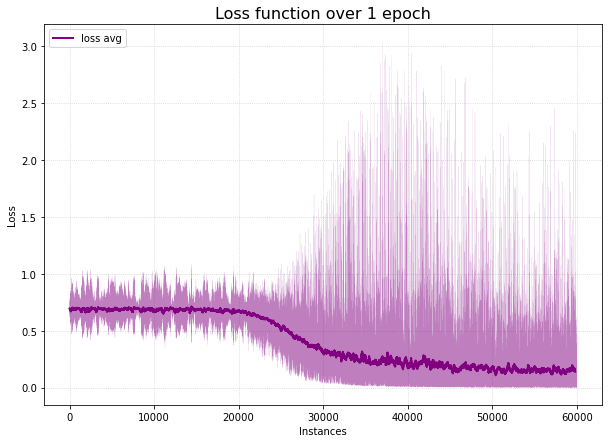

In [89]:
plt.figure(figsize=(10, 7))
plt.title('Loss function over 1 epoch',fontsize=16)

plt.xlabel('Instances')
plt.ylabel('Loss')

plt.grid(alpha =.6, linestyle =':')
plt.plot(avg_loss,  'purple',linewidth=2,alpha=1,label='Running average')
plt.legend(labels =['loss avg'], fontsize=10,loc='upper left')
plt.plot(dnn.losses,'purple',linewidth=0.1,alpha=0.5,label='loss')

plt.show()

In [42]:
np.linspace(0, 10, 50)

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])